In [43]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [44]:
from google.colab import files
uploaded = files.upload()


Saving hatla2ee_scraped_data_editedbyomar.csv to hatla2ee_scraped_data_editedbyomar (2).csv


In [45]:
#load dataset
used_cars_data = pd.read_csv('hatla2ee_scraped_data_editedbyomar.csv')


<ipython-input-45-281be4aaa7be>:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  used_cars_data = pd.read_csv('hatla2ee_scraped_data_editedbyomar.csv')


# Descriptive Analysis:

 What are the average resale values of used cars from different brands and nationalities in Egypt?


Sample Model Insight: Use bar plots to compare average resale values across different brands or nationalities.

*Data* *Cleaning*

In [46]:
used_cars_data_cleaned = used_cars_data.drop(columns=['Unnamed: 14', 'Unnamed: 15'])
used_cars_data_cleaned['Price'] = used_cars_data_cleaned['Price'].str.replace(' EGP', '').str.replace(',', '').astype(float)
used_cars_data_cleaned['Mileage'] = used_cars_data_cleaned['Mileage'].str.replace(' Km', '').str.replace(',', '').astype(float)
used_cars_data_cleaned = used_cars_data_cleaned.dropna(subset=['Price', 'Mileage'])


*Calculate* *average* *resale* *values* *and* *mileages* *for* *different* *brands* *and* *nationalities*

In [47]:
brand_stats = used_cars_data_cleaned.groupby('Make').agg({'Price': 'mean', 'Mileage': 'mean'}).reset_index()
nationality_stats = used_cars_data_cleaned.groupby('nationality').agg({'Price': 'mean', 'Mileage': 'mean'}).reset_index()


calculate mean of price

In [49]:
mean_price = used_cars_data_cleaned['Price'].mean()
print(f"Mean Price: {mean_price}")

Mean Price: 940811.4100980865


calculate median of price

In [50]:
median_price = used_cars_data_cleaned['Price'].median()
print(f"Median Price: {median_price}")

Median Price: 650000.0


calculate mode of price

In [51]:
mode_price = used_cars_data_cleaned['Price'].mode()[0]
print(f"Mode Price: {mode_price}")

Mode Price: 650000.0


calculate mean of mileage

In [52]:
mean_mileage = used_cars_data_cleaned['Mileage'].mean()
print(f"Mean Mileage: {mean_mileage}")

Mean Mileage: 151166.84656697218


calculate median of mileage

In [53]:
median_mileage = used_cars_data_cleaned['Mileage'].median()
print(f"Median Mileage: {median_mileage}")

Median Mileage: 129000.0


calculate mode of mileage

In [54]:
mode_mileage = used_cars_data_cleaned['Mileage'].mode()[0]
print(f"Mode Mileage: {mode_mileage}")

Mode Mileage: 200000.0


*Plot the average resale values*

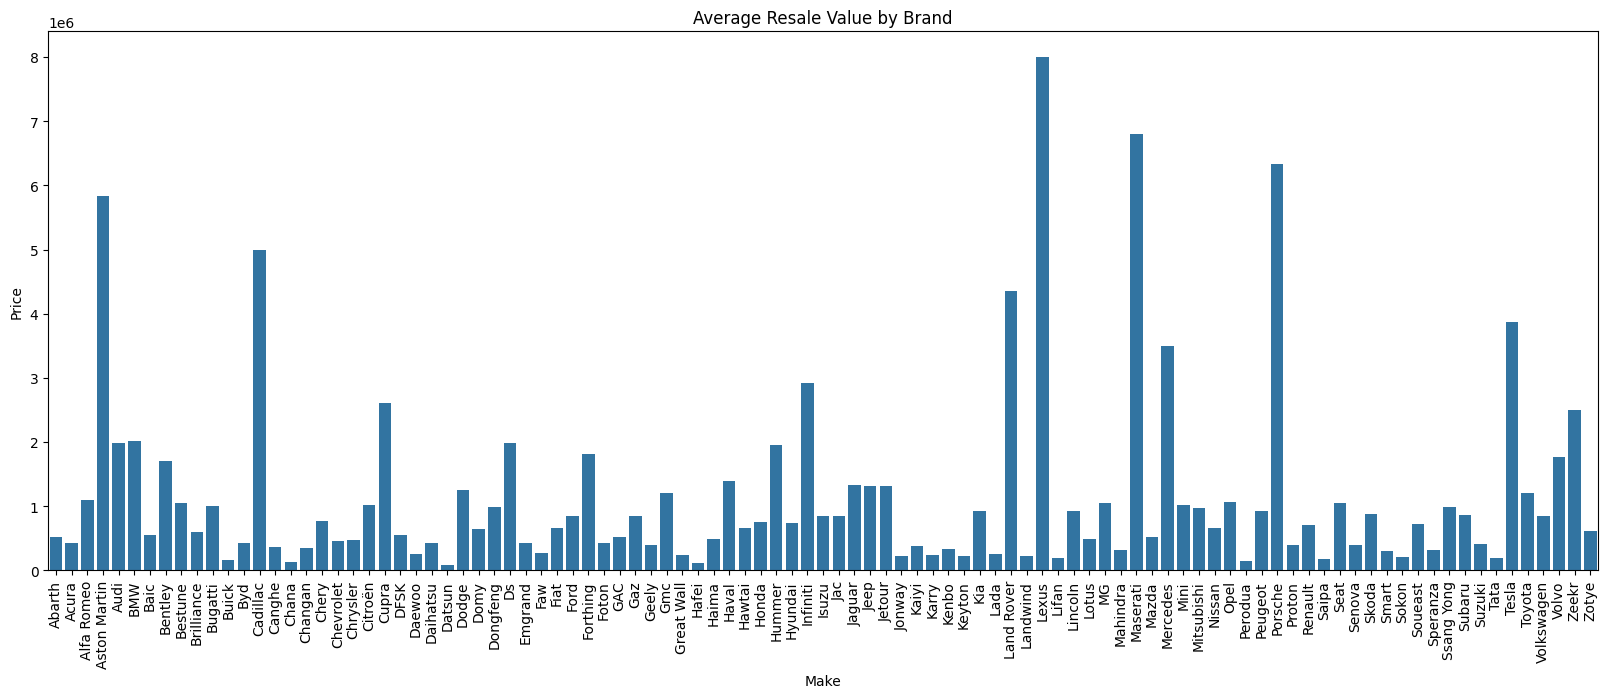

In [36]:
plt.figure(figsize=(20, 7))
sns.barplot(data=brand_stats, x='Make', y='Price')
plt.xticks(rotation=90)
plt.title('Average Resale Value by Brand')
plt.show()

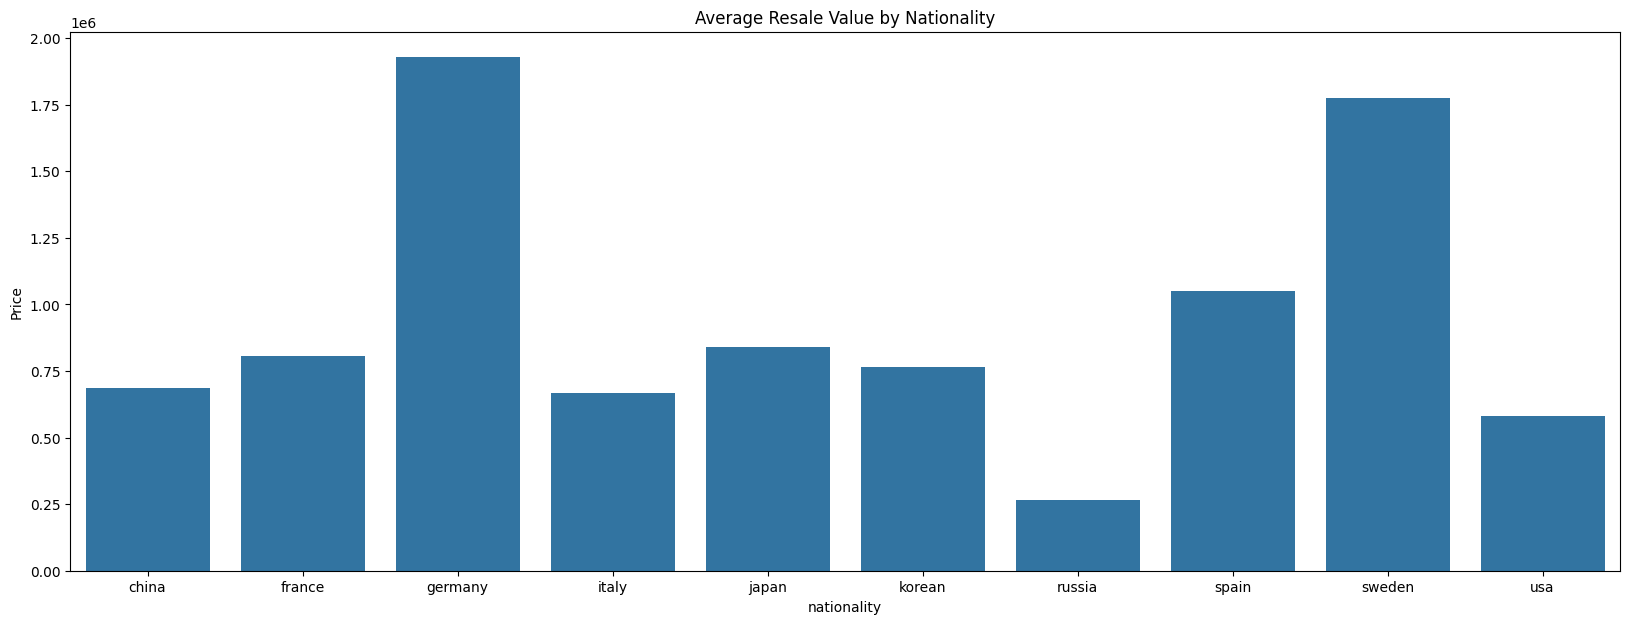

In [37]:
plt.figure(figsize=(20, 7))
sns.barplot(data=nationality_stats, x='nationality', y='Price')
plt.title('Average Resale Value by Nationality')
plt.show()

*Plot the average mileages*

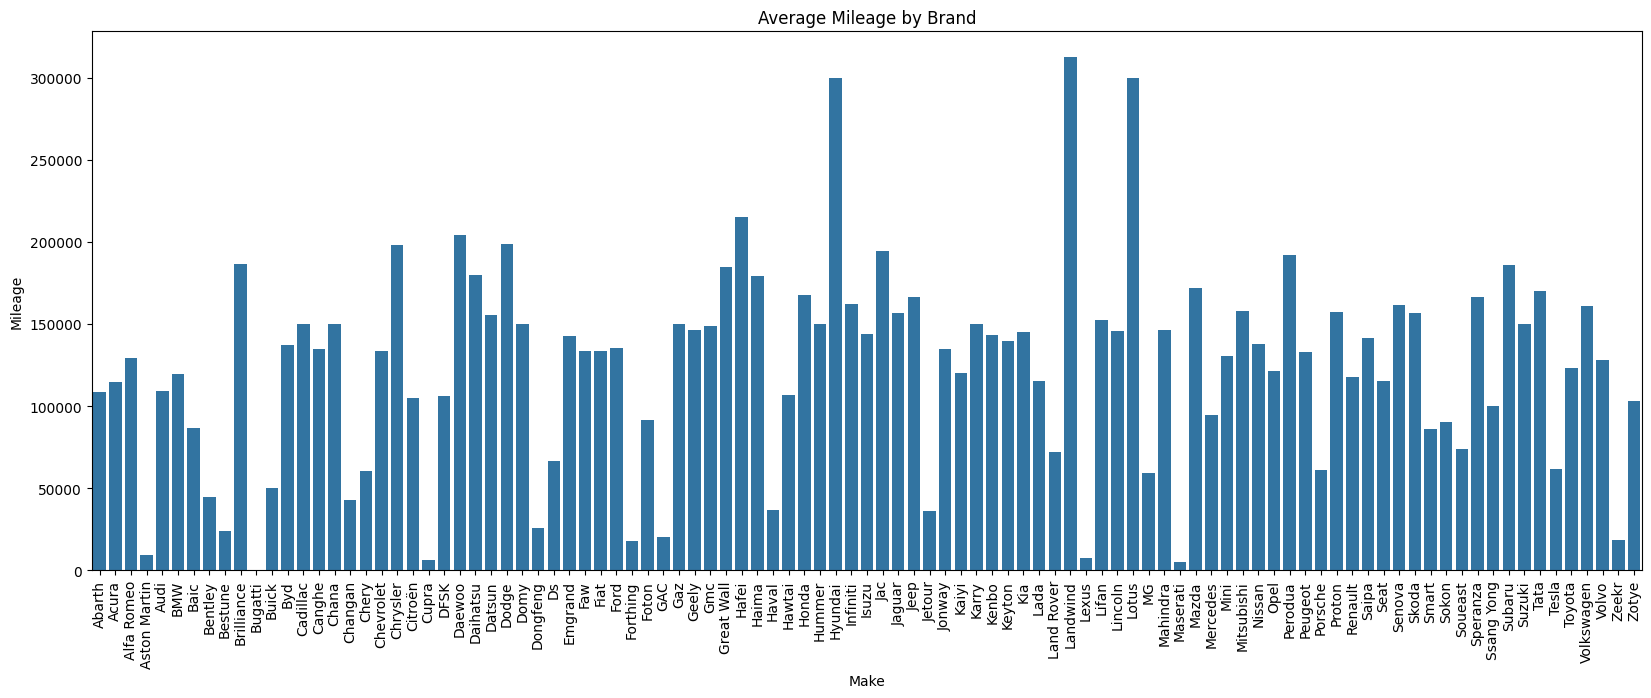

In [39]:
plt.figure(figsize=(20, 7))
sns.barplot(data=brand_stats, x='Make', y='Mileage')
plt.xticks(rotation=90)
plt.title('Average Mileage by Brand')
plt.show()

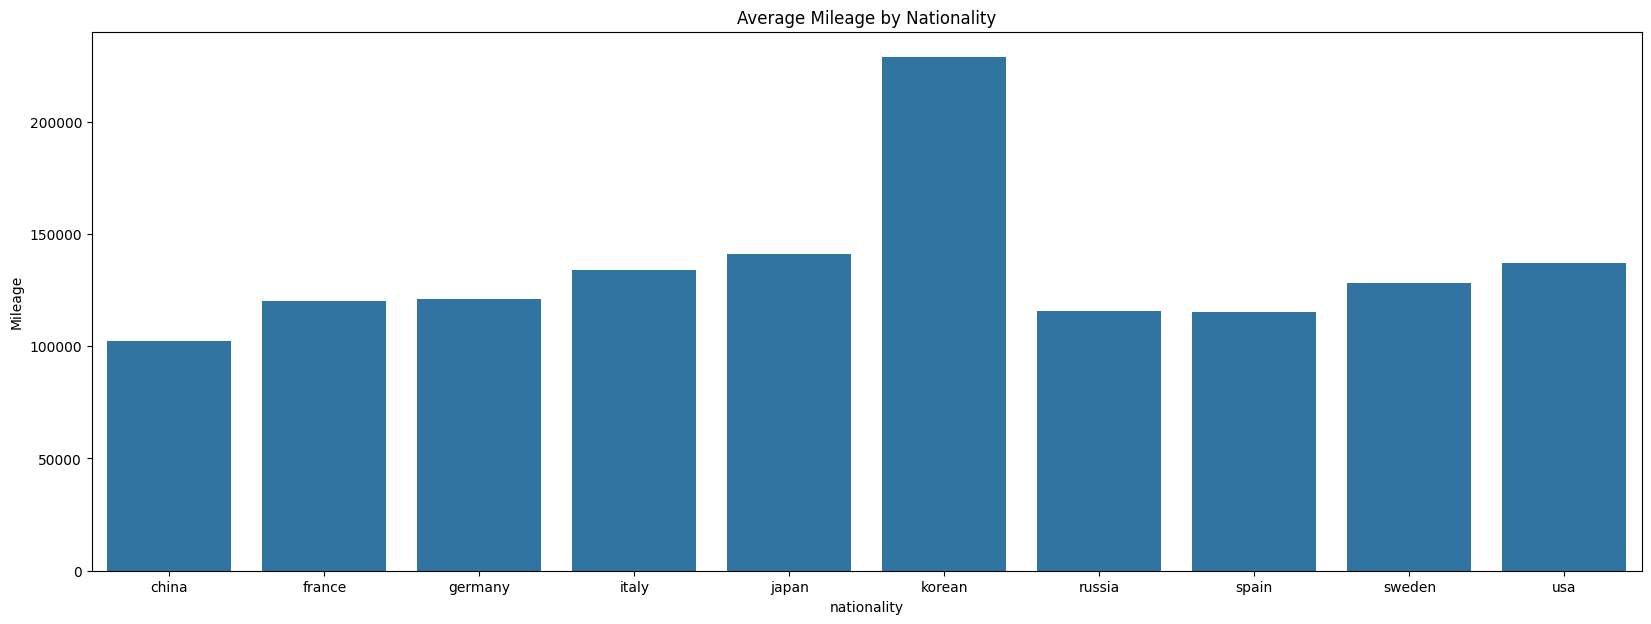

In [40]:
plt.figure(figsize=(20, 7))
sns.barplot(data=nationality_stats, x='nationality', y='Mileage')
plt.title('Average Mileage by Nationality')
plt.show()

# Mileage Impact:

 How does the resale value of used cars vary with mileage, and what is the strength of this relationship?


Sample Model Insight: Use scatter plots to visualize the relationship and add regression lines.

*Scatter plot to visualize the relationship between mileage and price*

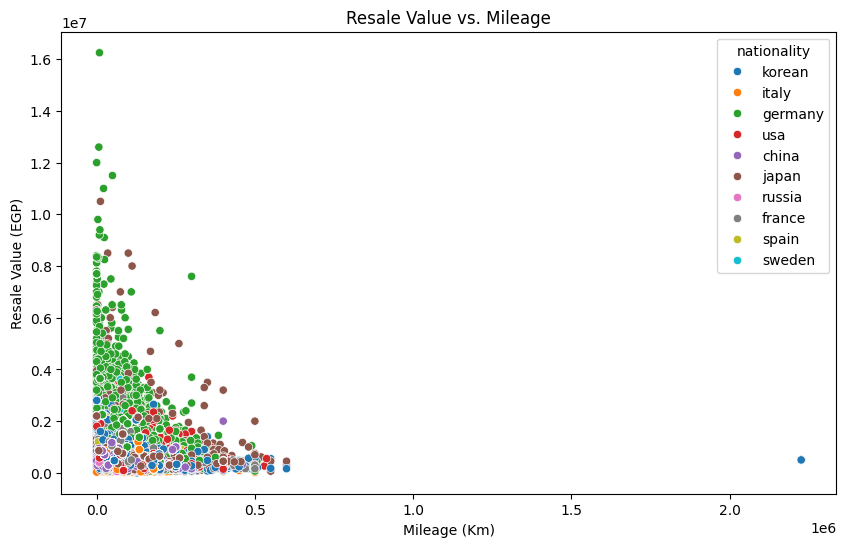

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_cars_data_cleaned, x='Mileage', y='Price', hue='nationality')
plt.title('Resale Value vs. Mileage')
plt.xlabel('Mileage (Km)')
plt.ylabel('Resale Value (EGP)')
plt.show()


box plot of the resale value by nationality:

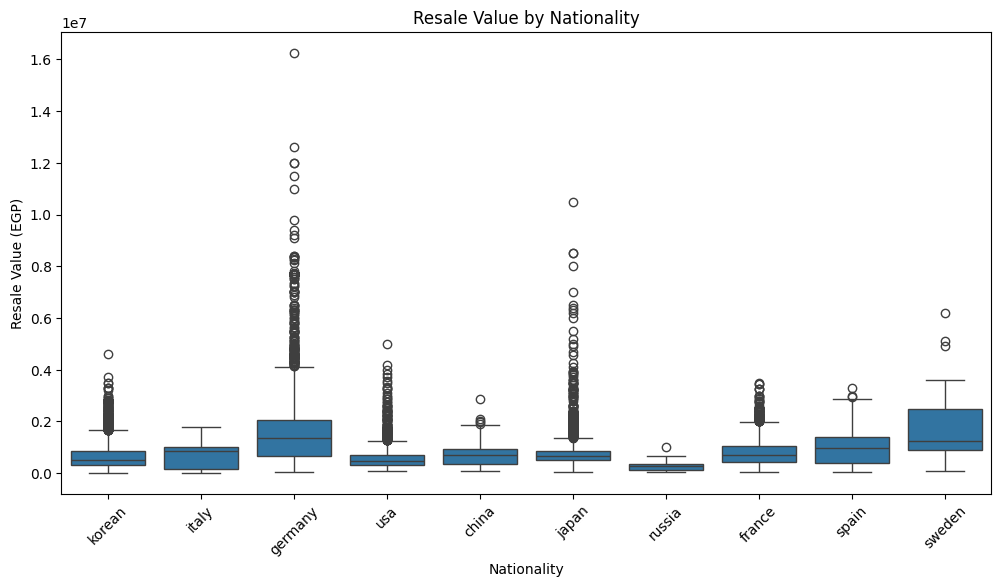

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='nationality', y='Price', data=used_cars_data_cleaned)
plt.title('Resale Value by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Resale Value (EGP)')
plt.xticks(rotation=45)
plt.show()

*Calculate the correlation between mileage and price*

In [26]:
correlation = used_cars_data_cleaned[['Mileage', 'Price']].corr()
print('Correlation between Mileage and Resale Value:')
print(correlation)

Correlation between Mileage and Resale Value:
          Mileage     Price
Mileage  1.000000 -0.197458
Price   -0.197458  1.000000


# Brand Comparison:

Updated Question: How do the average resale values and depreciation rates compare among Japanese, Korean, European, and American cars?

Sample Model Insight: Use grouped bar plots to show comparisons across different brands/nationalities.


*Calculate depreciation rates for different nationalities*

In [30]:
used_cars_data_cleaned['Depreciation Rate'] = used_cars_data_cleaned['Price'] / used_cars_data_cleaned['Mileage']

*Plot the average depreciation rates by nationality*

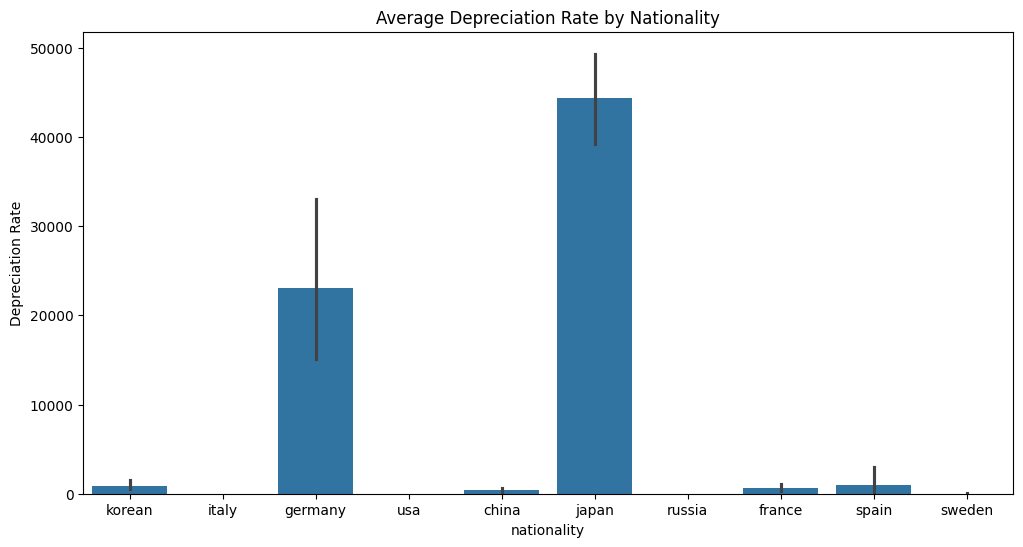

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=used_cars_data_cleaned, x='nationality', y='Depreciation Rate')
plt.title('Average Depreciation Rate by Nationality')
plt.show()

# Statistical Analysis:

Updated Question: What are the results of a regression analysis on the impact of mileage on the resale value of used cars, and how do these results vary by car nationality?

Sample Model Insight: Apply regression analysis and visualize the regression line with scatter plots.


*Regression analysis for the entire dataset*

In [31]:
X = used_cars_data_cleaned['Mileage']
y = used_cars_data_cleaned['Price']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sun, 26 May 2024   Prob (F-statistic):          6.95e-271
Time:                        13:02:25   Log-Likelihood:            -4.7457e+05
No. Observations:               31095   AIC:                         9.491e+05
Df Residuals:                   31093   BIC:                         9.492e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.085e+06   7099.174    152.794      0.0

*Regression analysis by nationality*

In [32]:
# Perform ANOVA
model = ols('Price ~ C(nationality)', data=used_cars_data_cleaned).fit()
anova_table = anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                      sum_sq       df           F  PR(>F)
C(nationality)  5.531169e+15      9.0  723.826897     0.0
Residual        2.529357e+16  29790.0         NaN     NaN


# Conclusion :

The analysis of used car data in Egypt provides valuable insights into the factors affecting resale value, with a specific focus on mileage and the country of origin. The results of this study have several important implications for both buyers and sellers in the used car market.

 1.Impact of Mileage on Resale Value:

  *The linear regression analysis reveals a significant negative relationship between mileage and resale value. This finding confirms the hypothesis that higher mileage significantly decreases the resale value of used cars in Egypt. This relationship is statistically significant, as indicated by the very low p-value (< 0.05). Therefore, buyers should consider the mileage of a car as a critical factor when evaluating its price, and sellers should be aware that high mileage can substantially lower their vehicle's market value.*

  2.Retention of Value by Country of Origin:

  *The ANOVA test results demonstrate significant differences in the resale values of used cars from different countries. Specifically, Japanese and Korean cars tend to retain their value better over time compared to European and American cars. This conclusion is supported by the very low p-value (< 0.05) in the ANOVA test. These findings suggest that buyers looking for vehicles with better long-term value retention should consider Japanese and Korean brands.*

  3.Policy and Practical Implications:

  *For Buyers: The study emphasizes the importance of considering both mileage and the country of origin when purchasing a used car. Understanding these factors can help buyers make more informed decisions and potentially save money in the long run.*

  *For Sellers: Sellers can use these insights to better price their vehicles and highlight key selling points, such as lower mileage or being from a brand known for better value retention.*

  *For Policymakers: The results could inform policies aimed at regulating the used car market, ensuring transparency in vehicle history reporting, and promoting fair pricing practices.*

  4.Future Research:

  *This study lays the groundwork for future research into other factors that may affect used car prices, such as the impact of specific car models, market demand fluctuations, and economic conditions. Further studies could also explore the resale value trends over more extended periods and across different regions within Egypt.*


  
**In conclusion, the findings of this analysis provide a robust foundation for understanding the dynamics of the used car market in Egypt. They offer actionable insights for consumers, sellers, and policymakers, ultimately contributing to a more transparent and efficient market.**